# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 1

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


In [ ]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
%matplotlib inline

In [ ]:
np.__version__

'1.21.0'

In [ ]:
pd.__version__

'1.3.0'

In [ ]:
sns.__version__

'0.11.1'

In [ ]:
mat.__version__

'3.4.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset
clean_data_path = "/content/drive/MyDrive/Colab Notebooks/DSA/Cap09/Mini-Projeto2/dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding="latin-1")

## Distribuição de Veículos com base no Ano de Registro

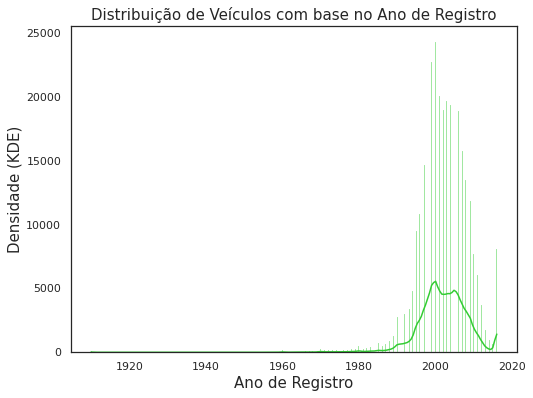

In [ ]:
# Crie um Plot com a Distribuição de Veículos com base no Ano de Registro
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df["yearOfRegistration"], color="#33cc33",kde=True, ax=ax)
ax.set_title('Distribuição de Veículos com base no Ano de Registro', fontsize= 15)
plt.ylabel("Densidade (KDE)", fontsize= 15)
plt.xlabel("Ano de Registro", fontsize= 15)
plt.show()

In [ ]:
# Salvando o plot
fig.savefig("plots/Analise1/vehicle-distribution.png")

## Variação da faixa de preço pelo tipo de veículo

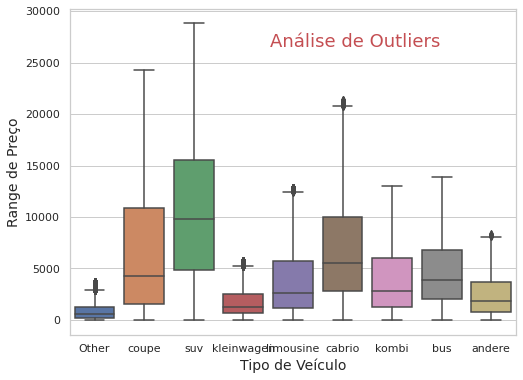

In [ ]:
# Crie um Boxplot para avaliar os outliers
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="vehicleType", y="price", data=df)
ax.text(5.25,27000,"Análise de Outliers",fontsize=18,color="r",ha="center", va="center")
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':14})
ax.yaxis.set_label_text("Range de Preço",fontdict= {'size':14})
plt.show()

In [ ]:
# Salvando o plot
fig.savefig("plots/Analise1/price-vehicleType-boxplot.png")

## Contagem total de veículos à venda conforme o tipo de veículo

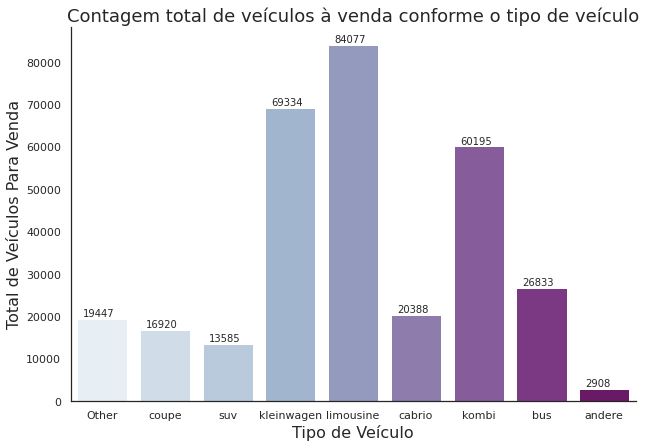

In [ ]:
# Crie um Count Plot que mostre o número de veículos pertencentes a cada categoria 
sns.set_style("white")
g = sns.catplot(x="vehicleType", data=df, kind="count", palette="BuPu", height=6, aspect=1.5)
g.ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total de Veículos Para Venda", fontdict= {'size':16})
g.ax.set_title("Contagem total de veículos à venda conforme o tipo de veículo",fontdict= {'size':18})
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

In [ ]:
# Salvando o plot
g.savefig("plots/Analise1/count-vehicleType.png")

## Número de veículos pertencentes a cada marca

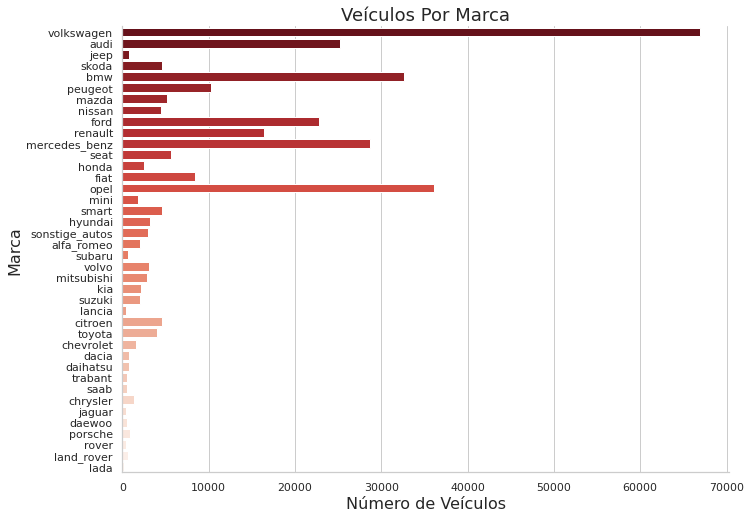

In [ ]:
# Crie um Plot que mostre o número de veículos pertencentes a cada marca
sns.set_style("whitegrid")
g = sns.catplot(y="brand", data=df, kind="count", palette="Reds_r", height=7, aspect=1.5)
g.ax.set_title("Veículos Por Marca",fontdict={'size':18})
g.ax.xaxis.set_label_text("Número de Veículos",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Marca",fontdict= {'size':16})
plt.show()

## Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

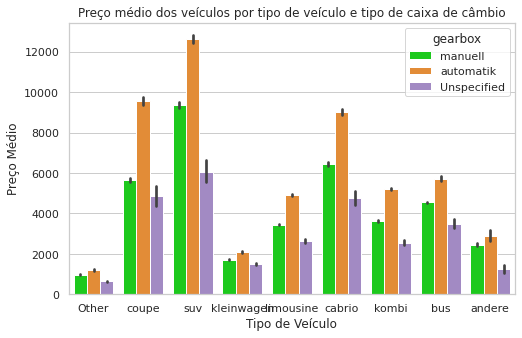

In [ ]:
# Crie um Plot com o Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="vehicleType", y="price",hue="gearbox", palette=colors, data=df)
ax.set_title("Preço médio dos veículos por tipo de veículo e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':12})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':12})
plt.show()

## Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio

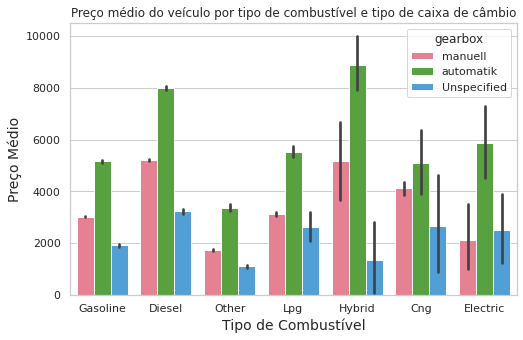

In [ ]:
# Crie um Barplot com o Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="fuelType", y="price",hue="gearbox", palette="husl",data=df)
ax.set_title("Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Combustível",fontdict= {'size':14})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':14})
plt.show()

## Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio

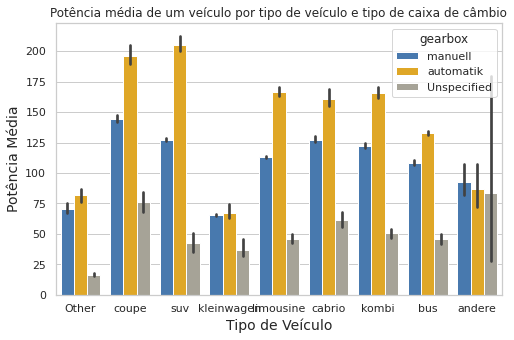

In [ ]:
# Crie um Barplot com a Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(8,5))
sns.set_palette(sns.xkcd_palette(colors))
sns.barplot(x="vehicleType", y="powerPS",hue="gearbox",data=df)
ax.set_title("Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':14})
ax.yaxis.set_label_text("Potência Média",fontdict= {'size':14})
plt.show()

In [ ]:
# Calcule a média de preço por marca e por veículo
trial = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


## Preço médio de um veículo por marca, bem como tipo de veículo

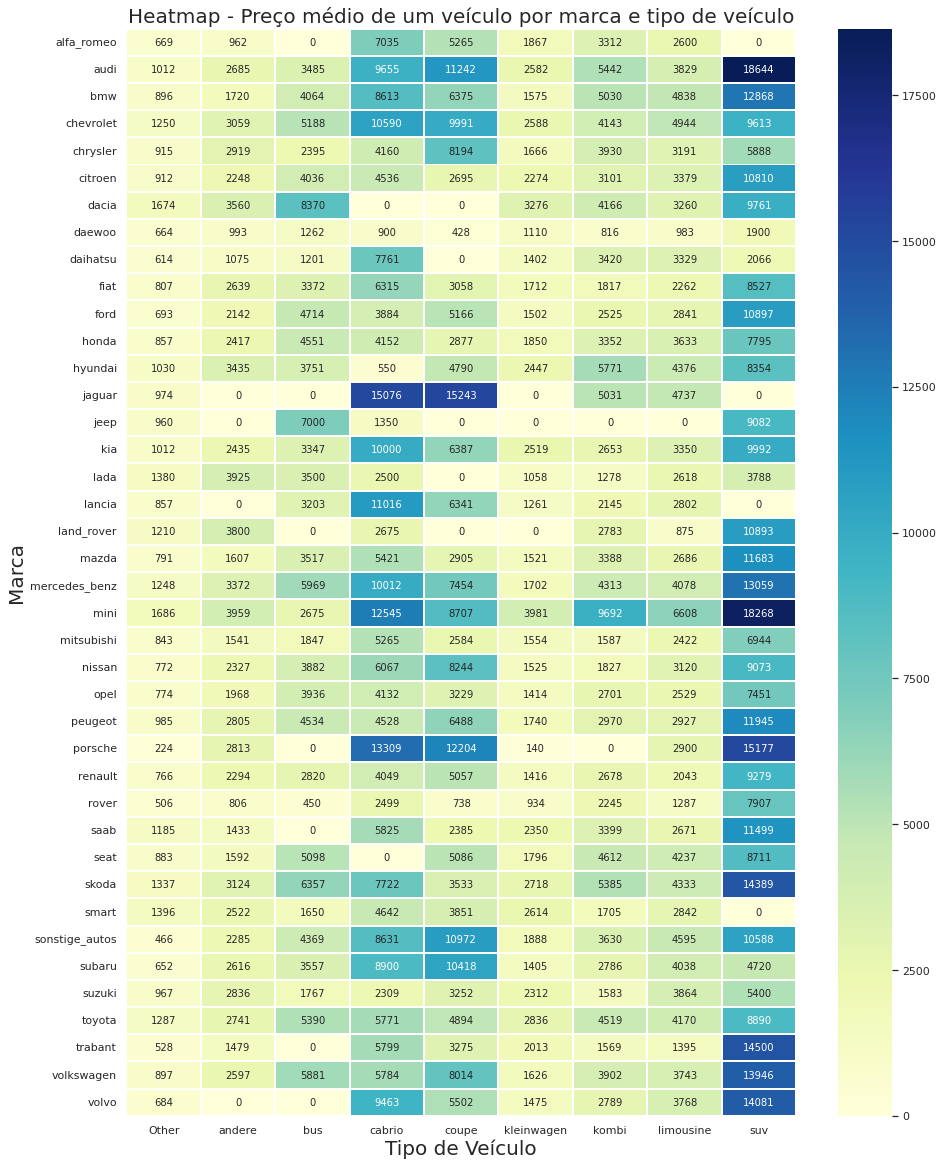

In [ ]:
# Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Preço médio de um veículo por marca e tipo de veículo",fontdict={'size':20})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':20})
ax.yaxis.set_label_text("Marca",fontdict= {'size':20})
plt.show()

In [ ]:
# Salvando o plot
fig.savefig("plots/Analise4/heatmap-price-brand-vehicleType.png")

# Iris

In [ ]:
# Imports
import time
import numpy as np
import pandas as pd
import matplotlib as mat
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

fontsize = 14
ticklabelsize = 14

In [ ]:
# Carregando o dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(len(df))
df.head()

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: setosa, versicolor ou virginica
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: 0, 1 ou 2
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Adicione ao dataset uma nova coluna com os nomes das espécies, pois é isso que vamos tentar prever (variável target)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Inclua no dataset uma coluna com os valores numéricos da variável target
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
# Extraia as features (atributos) do dataset e imprima 
print(df.columns[:4])

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [ ]:
# Calcule a média de cada feature para as 3 classes
df.groupby('target').mean().T

target,0,1,2
sepal length (cm),5.006,5.936,6.588
sepal width (cm),3.428,2.770,2.974
petal length (cm),1.462,4.260,5.552
petal width (cm),0.246,1.326,2.026


## Exploração dos dados

In [ ]:
# Imprima uma Transposta do dataset (transforme linhas e colunas e colunas em linhas)
transpose = df.transpose()
transpose

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
sepal length (cm),5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,5.4,4.8,4.8,4.3,5.8,5.7,5.4,5.1,5.7,5.1,5.4,5.1,4.6,5.1,4.8,5.0,5.0,5.2,5.2,4.7,4.8,5.4,5.2,5.5,4.9,5.0,5.5,4.9,4.4,5.1,...,6.5,6.4,6.8,5.7,5.8,6.4,6.5,7.7,7.7,6.0,6.9,5.6,7.7,6.3,6.7,7.2,6.2,6.1,6.4,7.2,7.4,7.9,6.4,6.3,6.1,7.7,6.3,6.4,6.0,6.9,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width (cm),3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,3.7,3.4,3.0,3.0,4.0,4.4,3.9,3.5,3.8,3.8,3.4,3.7,3.6,3.3,3.4,3.0,3.4,3.5,3.4,3.2,3.1,3.4,4.1,4.2,3.1,3.2,3.5,3.6,3.0,3.4,...,3.2,2.7,3.0,2.5,2.8,3.2,3.0,3.8,2.6,2.2,3.2,2.8,2.8,2.7,3.3,3.2,2.8,3.0,2.8,3.0,2.8,3.8,2.8,2.8,2.6,3.0,3.4,3.1,3.0,3.1,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,1.5,1.6,1.4,1.1,1.2,1.5,1.3,1.4,1.7,1.5,1.7,1.5,1.0,1.7,1.9,1.6,1.6,1.5,1.4,1.6,1.6,1.5,1.5,1.4,1.5,1.2,1.3,1.4,1.3,1.5,...,5.1,5.3,5.5,5.0,5.1,5.3,5.5,6.7,6.9,5.0,5.7,4.9,6.7,4.9,5.7,6.0,4.8,4.9,5.6,5.8,6.1,6.4,5.6,5.1,5.6,6.1,5.6,5.5,4.8,5.4,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,0.2,0.2,0.1,0.1,0.2,0.4,0.4,0.3,0.3,0.3,0.2,0.4,0.2,0.5,0.2,0.2,0.4,0.2,0.2,0.2,0.2,0.4,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,...,2.0,1.9,2.1,2.0,2.4,2.3,1.8,2.2,2.3,1.5,2.3,2.0,2.0,1.8,2.1,1.8,1.8,1.8,2.1,1.6,1.9,2.0,2.2,1.5,1.4,2.3,2.4,1.8,1.8,2.1,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
species,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
target,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
#ou
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
sepal length (cm),5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9
sepal width (cm),3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1
species,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa
target,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Faça uma contagem de valores de sepal length
df['sepal length (cm)'].value_counts(dropna=False)

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal length (cm), dtype: int64

##Plot

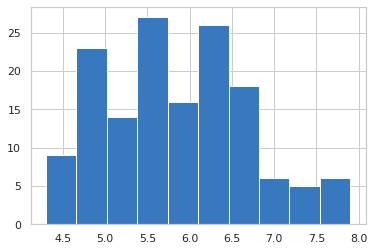

In [ ]:
# Crie um Histograma de sepal length
df['sepal length (cm)'].hist()

Text(0.5, 1.0, 'Gráfico de Dispersão dos Atributos, colorido por marcadores da classe alvo')

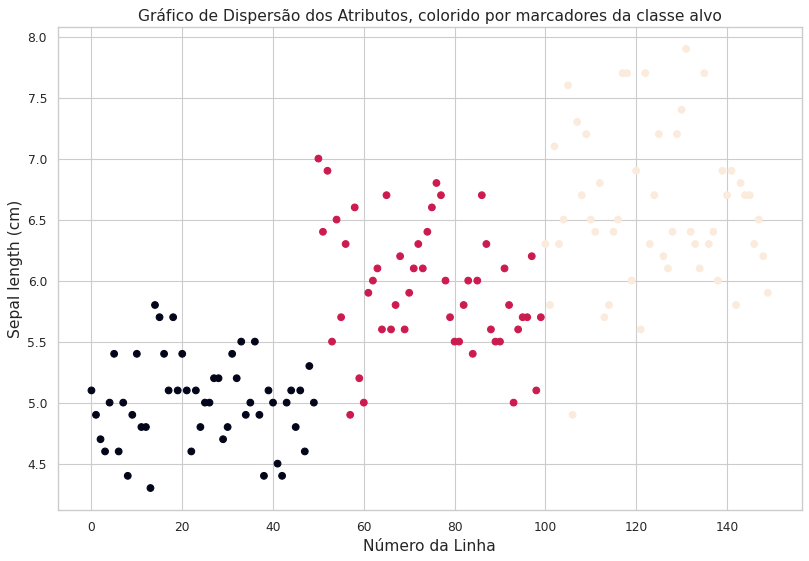

In [ ]:
# Crie um Gráficos de Dispersão (scatter Plot) da variável sepal length versus número da linha, 
# colorido por marcadores da variável target
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(range(len(df)), df['sepal length (cm)'], c=df['target'])
plt.xlabel('Número da Linha', fontsize=fontsize)
plt.ylabel('Sepal length (cm)', fontsize=fontsize)
plt.title('Gráfico de Dispersão dos Atributos, colorido por marcadores da classe alvo', fontsize=fontsize)
#plt.title('Scatter plot of features, colored by target labels', fontsize=fontsize)

Text(0, 0.5, 'petal width (cm)')

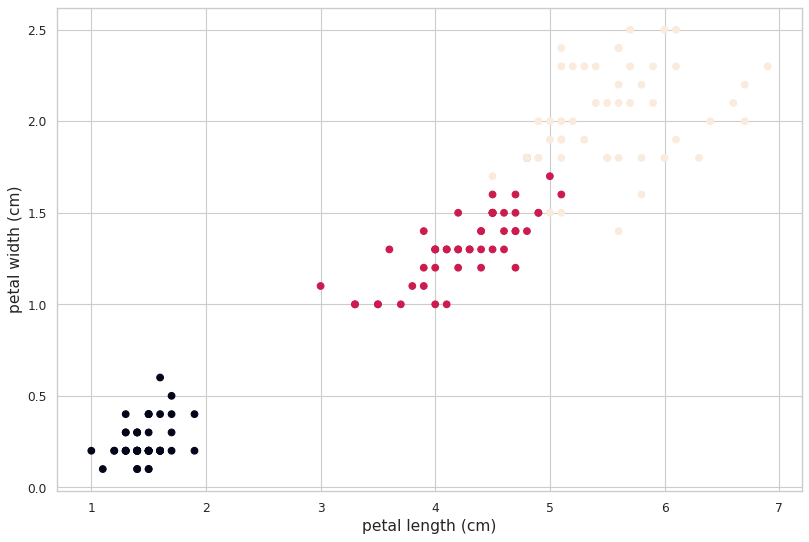

In [ ]:
# Crie um Scatter Plot de 2 Features (atributos)
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['target'])
plt.xlabel('petal length (cm)', fontsize=fontsize)
plt.ylabel('petal width (cm)', fontsize=fontsize)

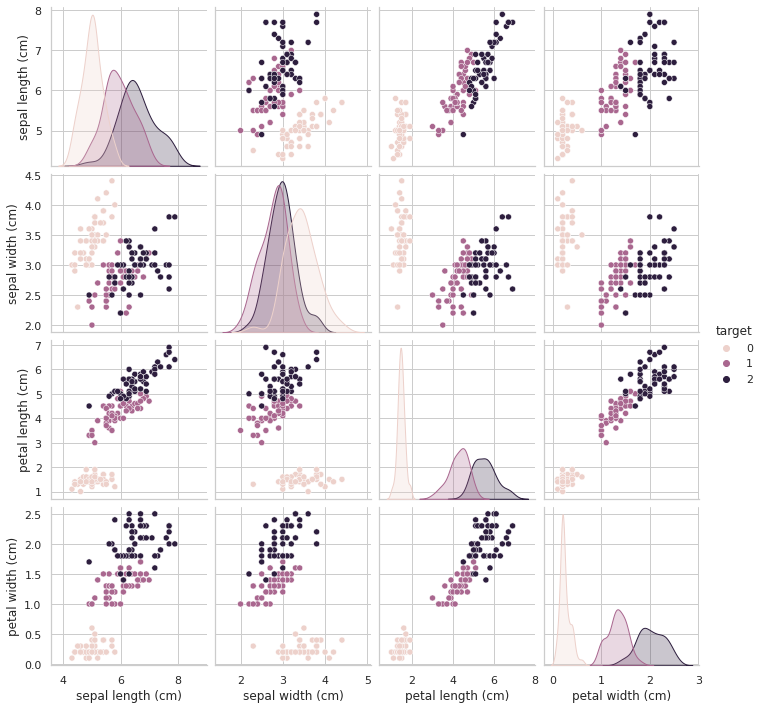

In [ ]:
# Crie um Scatter Matrix das Features (atributos)
import seaborn as sns
sns.pairplot(df, hue="target")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8580f299d0>,
      dtype=object)

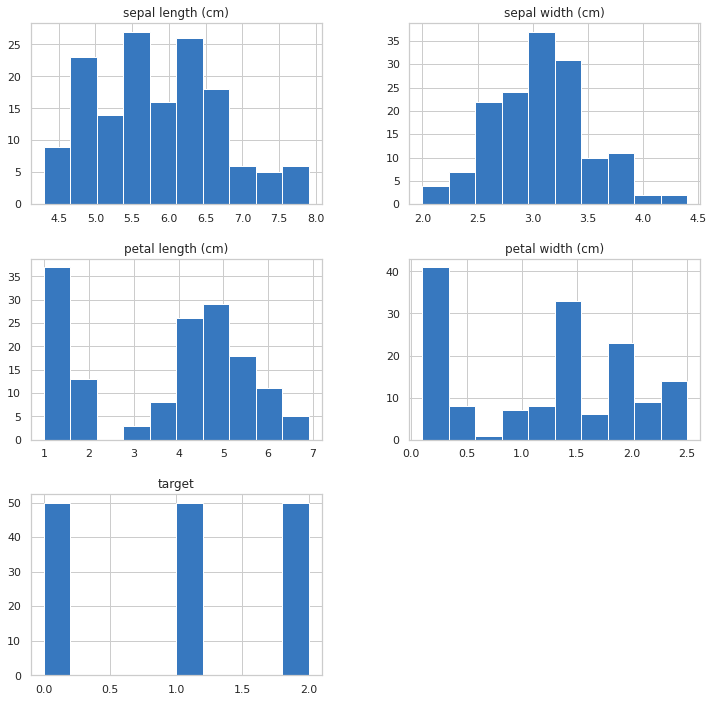

In [ ]:
# Crie um Histograma de todas as features
df.hist(figsize=(12,12))